<a href="https://colab.research.google.com/github/WardaAli-00/Programming-For-Ai-Assignment/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(url, names=column_names, na_values="?")

In [ ]:
# Handle missing values (remove rows with NaNs)
data.dropna(inplace=True)

In [ ]:
# Features and target
X = X[X.index.isin(y.index)] # Keep only the indices that are present in both X and y
y = y[y.index.isin(X.index)] #   # Reclassify target as binary (0, 1)


In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Initialize classifiers
classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="linear", probability=True),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [ ]:
# Evaluation function
def evaluate_model(model, X, y, cv_folds):
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    accuracy = cross_val_score(model, X, y, cv=skf, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=skf, scoring='precision').mean()
    recall = cross_val_score(model, X, y, cv=skf, scoring='recall').mean()
    f1 = cross_val_score(model, X, y, cv=skf, scoring='f1').mean()
    return accuracy, precision, recall, f1

In [ ]:
# Cross-validation results
results = []
for name, clf in classifiers.items():
    for folds in [5, 10]:
        accuracy, precision, recall, f1 = evaluate_model(clf, X_scaled, y, cv_folds=folds)
        results.append({
            "Model": name,
            "Folds": folds,
            "Accuracy (%)": round(accuracy * 100, 2),
            "Precision (%)": round(precision * 100, 2),
            "Recall (%)": round(recall * 100, 2),
            "F1 Score (%)": round(f1 * 100, 2)
        })


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 238, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 475, in _fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1064, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:
# Results DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                  Model  Folds  Accuracy (%)  Precision (%)  Recall (%)  \
0                   KNN      5         81.79          82.19       77.99   
1                   KNN     10         79.47          80.25       74.40   
2                   SVM      5         81.80          83.36       75.85   
3                   SVM     10         82.49          84.07       77.36   
4           Naive Bayes      5         83.48          84.46       78.76   
5           Naive Bayes     10         83.17          84.56       78.02   
6         Random Forest      5         80.46          80.39       76.56   
7         Random Forest     10         81.84          84.02       75.88   
8   Logistic Regression      5         82.80          84.06       77.28   
9   Logistic Regression     10         83.16          84.35       78.79   
10    Gradient Boosting      5         81.12          80.82       77.22   
11    Gradient Boosting     10         77.41          77.66       75.05   

    F1 Score (%)  
0    

In [ ]:
# Visualize results
import seaborn as sns
import matplotlib.pyplot as plt

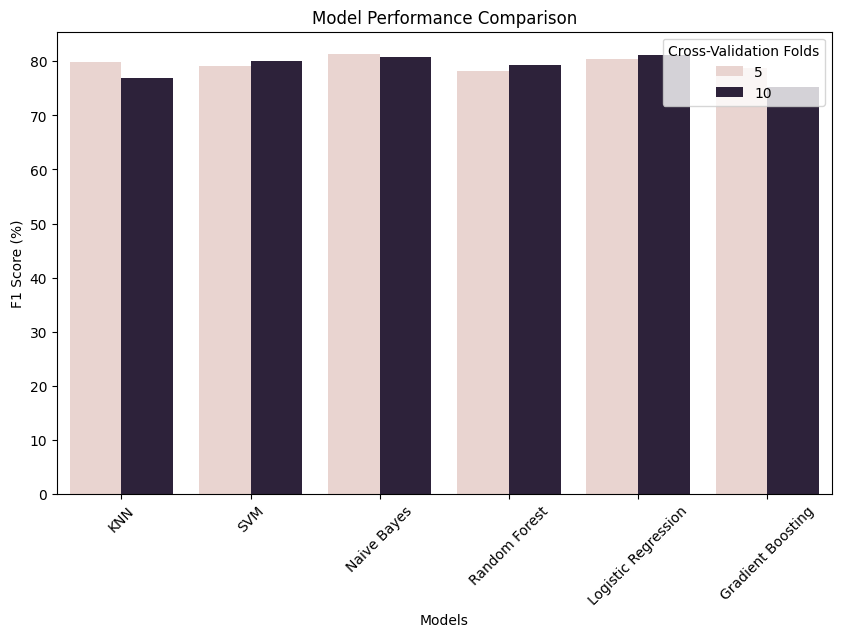

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="F1 Score (%)", hue="Folds")
plt.title("Model Performance Comparison")
plt.ylabel("F1 Score (%)")
plt.xlabel("Models")
plt.legend(title="Cross-Validation Folds")
plt.xticks(rotation=45)
plt.show()

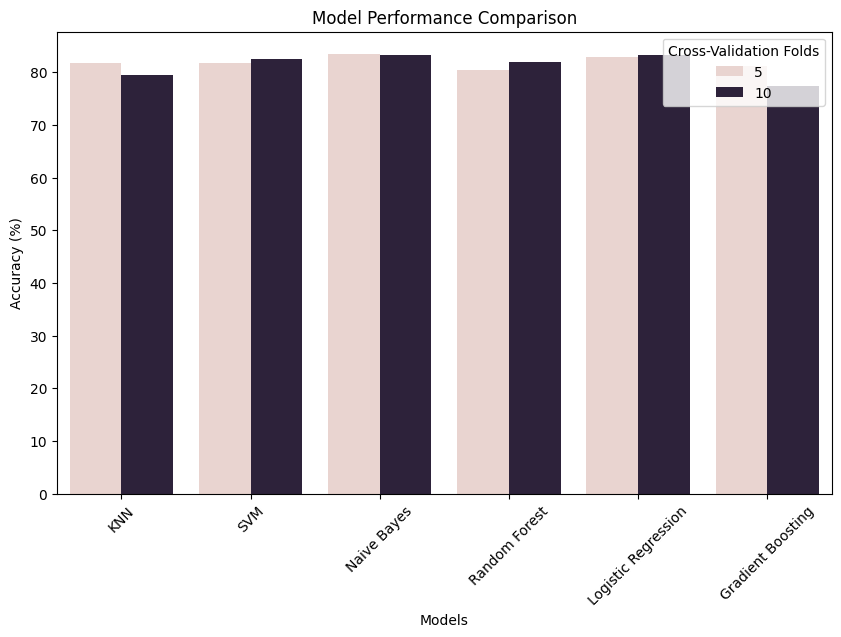

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="Accuracy (%)", hue="Folds")
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy (%)")
plt.xlabel("Models")
plt.legend(title="Cross-Validation Folds")
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo, list_available_datasets
# check which datasets can be imported
list_available_datasets()

# import dataset
heart_disease = fetch_ucirepo(id=45)
# alternatively: fetch_ucirepo(name='Heart Disease')

# access data
X = heart_disease.data.features
y = heart_disease.data.targets
# train model e.g. sklearn.linear_model.LinearRegression().fit(X, y)

# access metadata
print(heart_disease.metadata.uci_id)
print(heart_disease.metadata.num_instances)
print(heart_disease.metadata.additional_info.summary)

# access variable info in tabular format
print(heart_disease.variables)

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.pipeline import Pipeline

In [ ]:
def perform_eda(data):
    print("Dataset Information:")
    print(data.info())
    print("\nBasic Statistics:")
    print(data.describe())

In [ ]:
# Univariate Analysis
def create_univariate_plots(data):
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(data.columns[:-1], start=1):
        plt.subplot(4, 4, i)
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

In [ ]:
# Correlation Heatmap
def create_correlation_heatmap(data):
    plt.figure(figsize=(10, 6))
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

In [ ]:
 # Bivariate Analysis: Target vs Features
 def create_bivariate_plots(data):
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(data.columns[:-1], start=1):
        plt.subplot(4, 4, i)
        sns.boxplot(x=data["target"], y=data[col], palette="Set2")
        plt.title(f"Target vs {col}")
    plt.tight_layout()
    plt.show()


In [ ]:
perform_eda(data)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB
None

Basic Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088

In [ ]:
scaler = MinMaxScaler()
custom_transformer = FunctionTransformer(np.log1p, validate=True)  # Example of a custom transformation
preprocessor = ColumnTransformer(
    transformers=[
        ("scaler", scaler, X.columns),
        ("custom_transform", custom_transformer, ["chol", "trestbps"]),  # Apply log transformation to specific columns
    ],
    remainder="passthrough"  # Keep other columns as is
)


In [ ]:
# Combine Preprocessing Steps into a Pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
])

# Preprocess features
X_preprocessed = pipeline.fit_transform(X)


In [ ]:
# Display Processed Data
print("\nPreprocessed Features (First 5 rows):")

# Get column names after transformation
# Assuming 'scaler' and 'custom_transform' are your transformer names
transformed_col_names = pipeline.named_steps['preprocessing'].transformers_[0][2]  # Get scaled column names
transformed_col_names = list(transformed_col_names)  # Convert to a list if it's not already
transformed_col_names.extend(pipeline.named_steps['preprocessing'].transformers_[1][2]) # Add custom transformed column names

# Create a DataFrame with the correct column names
print(pd.DataFrame(X_preprocessed, columns=transformed_col_names).head())



Preprocessed Features (First 5 rows):
        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  0.000000  0.481132  0.244292  1.0      1.0  0.603053    0.0   
1  0.791667  1.0  1.000000  0.622642  0.365297  0.0      1.0  0.282443    1.0   
2  0.791667  1.0  1.000000  0.245283  0.235160  0.0      1.0  0.442748    1.0   
3  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.0  0.885496    0.0   
4  0.250000  0.0  0.333333  0.339623  0.178082  0.0      1.0  0.770992    0.0   

    oldpeak  slope        ca  thal      chol  trestbps  
0  0.370968    1.0  0.000000  0.75  5.455321  4.983607  
1  0.241935    0.5  1.000000  0.00  5.659482  5.081404  
2  0.419355    0.5  0.666667  1.00  5.438079  4.795791  
3  0.564516    1.0  0.000000  0.00  5.525453  4.875197  
4  0.225806    0.0  0.000000  0.00  5.323010  4.875197  
